<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/HT9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andrea Marleny Hernández Contreras, 1203718

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
#svm -> suport virtual machine
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("orange.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   241 non-null    int64  
 1   Size         241 non-null    float64
 2   Weight       241 non-null    int64  
 3   Brix         241 non-null    float64
 4   pH           241 non-null    float64
 5   Softness     241 non-null    float64
 6   HarvestTime  241 non-null    int64  
 7   Ripeness     241 non-null    float64
 8   Color        241 non-null    object 
 9   Variety      241 non-null    object 
 10  Blemishes    241 non-null    object 
 11  Quality      241 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 22.7+ KB


In [10]:
df.isna().sum()

Unnamed: 0     0
Size           0
Weight         0
Brix           0
pH             0
Softness       0
HarvestTime    0
Ripeness       0
Color          0
Variety        0
Blemishes      0
Quality        0
dtype: int64

In [19]:
print("Colors: ",df["Color"].unique())
print("\nVariety:",df["Variety"].unique())
print("\nBlemishes",df["Blemishes"].unique())

Colors:  ['Orange' 'Deep Orange' 'Light Orange' 'Orange-Red' 'Yellow-Orange']

Variety: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Blemishes [ 0  3  4  5  6  7  8  9 10 11  1  2]


In [23]:
cleanup={"Color":{"Orange":0,"Deep Orange":1,"Light Orange":2,"Orange-Red":3,"Yellow-Orange":4},
         "Variety":{"Valencia":0,"Navel":1,"Cara Cara":2,"Blood Orange":3,"Hamlin":4,"Tangelo (Hybrid)":5,"Murcott (Hybrid)":6,"Moro (Blood)":7,"Jaffa":8,
                    "Clementine":9,"Washington Navel":10,"Star Ruby":11,"Tangerine":12,"Ambiance":13,"California Valencia":14,"Honey Tangerine":15,"Navel (Late Season)":16,
                    "Clementine (Seedless)":17,"Temple":18,"Minneola (Hybrid)":19,"Satsuma Mandarin":20,"Midsweet (Hybrid)":21,"Navel (Early Season)":22,"Ortanique (Hybrid)":23},
         "Blemishes":{"N":0,"N (Minor)":1,"N (Split Skin)":2,"Y (Minor)":3,"Y (Sunburn)":4,"Y (Mold Spot)":5,"Y (Bruise)":6,"Y (Split Skin)":7,"Y (Sunburn Patch)":8,"Y (Scars)":9,
                      "Y (Minor Insect Damage)":10,"Y (Bruising)":11}}

df = df.replace(cleanup)
df.describe()

,Unnamed: 0,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes,Quality
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,120.000000,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,1.676349,11.041494,2.742739,3.780083
std,69.714896,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.104452,6.864639,3.854678,1.023361
min,0.000000,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,60.000000,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,1.000000,7.000000,0.000000,3.000000
50%,120.000000,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,2.000000,11.000000,0.000000,4.000000
75%,180.000000,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,3.000000,18.000000,7.000000,4.000000
max,240.000000,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,4.000000,23.000000,11.000000,5.000000


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

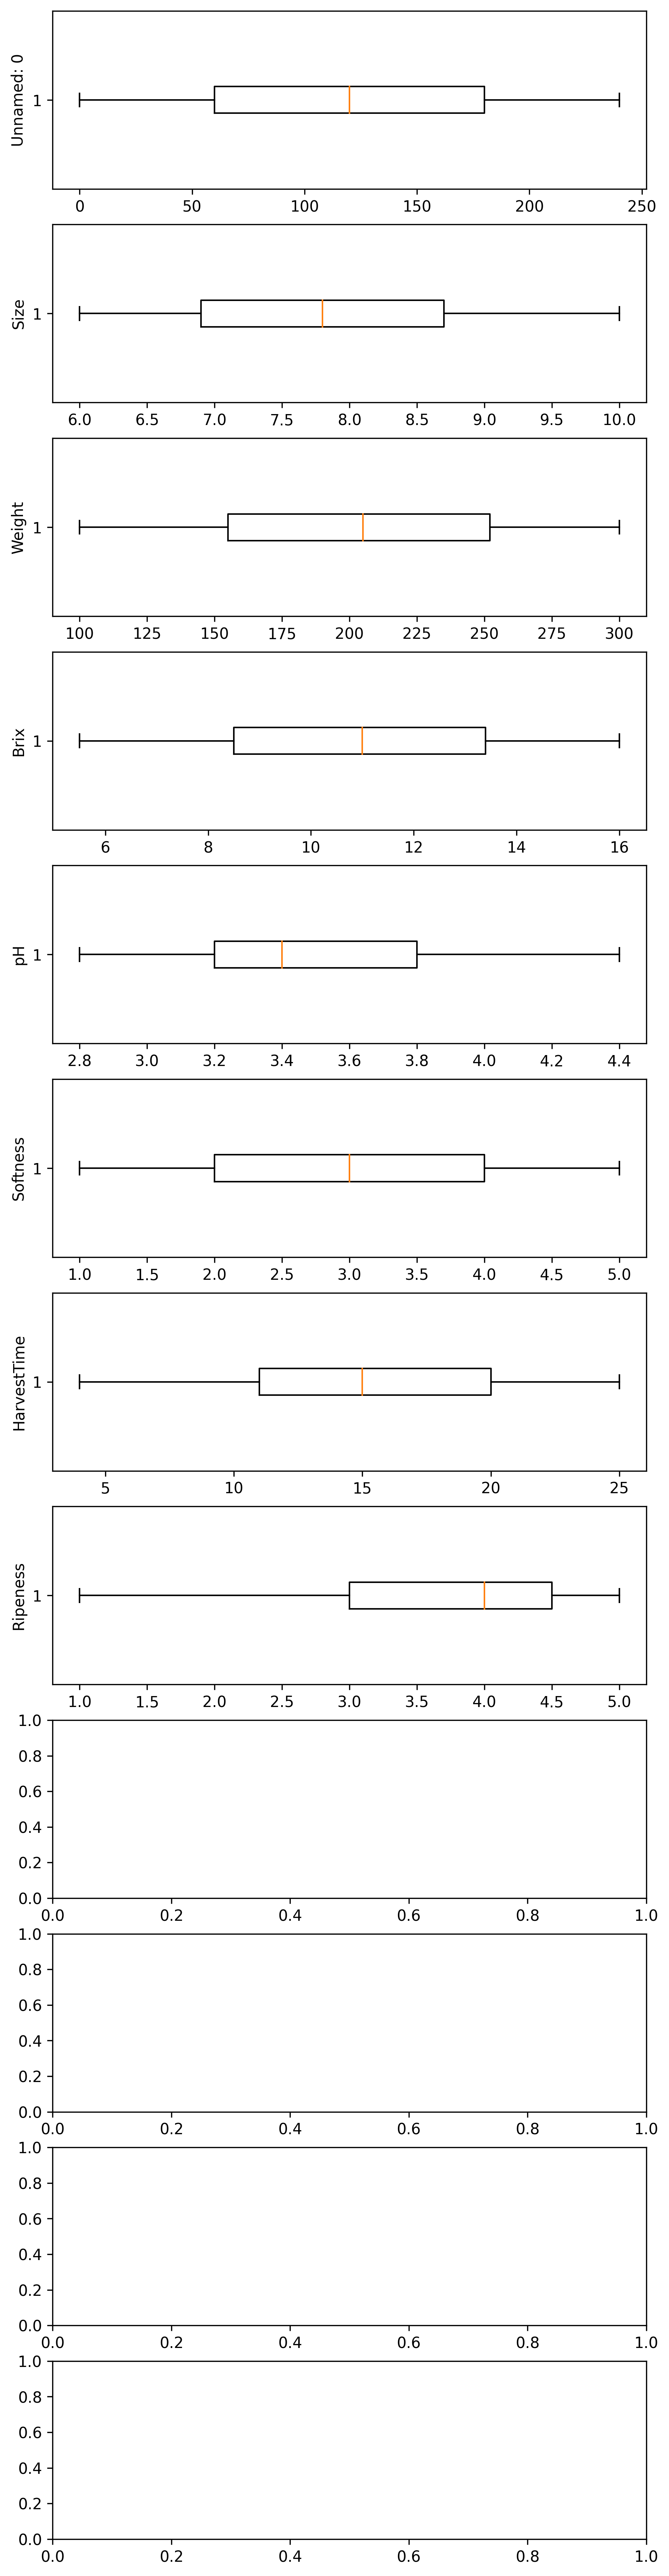

In [14]:
#Detección de Outliers
def mostrarOutliers(dataset):
  fig,axs= plt.subplots(12,1,dpi=300,figsize=(7,30))
  i = 0
  for col in dataset.columns:
    axs[i].boxplot(df[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1
  plt.show()

mostrarOutliers(df)